In [1]:
import sys
sys.path.append('../../Python/')
from Preprocessing import standardize, MaxMinScaler
from Databases import get_databases_path, get_database
from Evaluation import split_train_test, train_model, test_model

In [2]:
databases_path = '../../Databases/Sinteticas'
paths = get_databases_path(databases_path)


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/breast-cancer 


---- Results with Testing Set ----

-- Global Precision --
0.6081871345029239


-- General Report --
              precision    recall  f1-score   support

         yes       0.58      0.78      0.67        86
          no       0.66      0.44      0.52        85

    accuracy                           0.61       171
   macro avg       0.62      0.61      0.60       171
weighted avg       0.62      0.61      0.60       171



-- Confusion Matrix --
    0   1
0  67  19
1  48  37

ROC Curve: 

ROC AUC:  0.6161422708618332


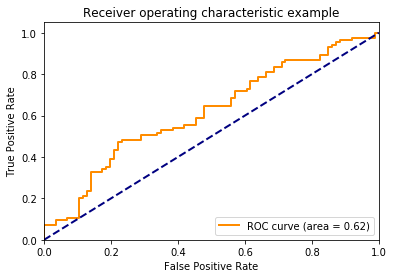


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/column 


---- Results with Testing Set ----

-- Global Precision --
0.5698924731182796


-- General Report --
              precision    recall  f1-score   support

         yes       0.57      0.84      0.68        50
          no       0.58      0.26      0.35        43

    accuracy                           0.57        93
   macro avg       0.57      0.55      0.52        93
weighted avg       0.57      0.57      0.53        93



-- Confusion Matrix --
    0   1
0  42   8
1  32  11

ROC Curve: 

ROC AUC:  0.5720930232558139


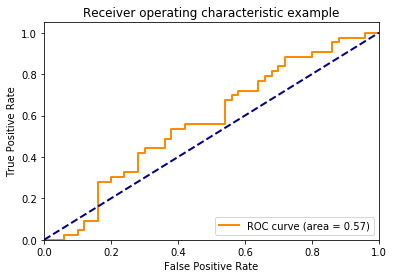


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/parkinsons 


---- Results with Testing Set ----

-- Global Precision --
0.6271186440677966


-- General Report --
              precision    recall  f1-score   support

         yes       0.63      0.89      0.74        35
          no       0.60      0.25      0.35        24

    accuracy                           0.63        59
   macro avg       0.62      0.57      0.55        59
weighted avg       0.62      0.63      0.58        59



-- Confusion Matrix --
    0  1
0  31  4
1  18  6

ROC Curve: 

ROC AUC:  0.6476190476190476


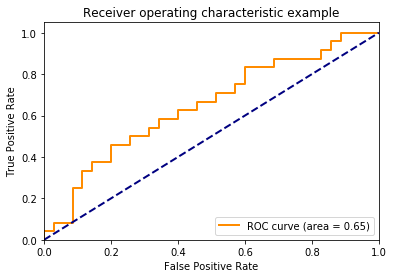


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/ionophere 


---- Results with Testing Set ----

-- Global Precision --
0.5619047619047619


-- General Report --
              precision    recall  f1-score   support

         yes       0.65      0.36      0.47        55
          no       0.53      0.78      0.63        50

    accuracy                           0.56       105
   macro avg       0.59      0.57      0.55       105
weighted avg       0.59      0.56      0.54       105



-- Confusion Matrix --
    0   1
0  20  35
1  11  39

ROC Curve: 

ROC AUC:  0.5749090909090909


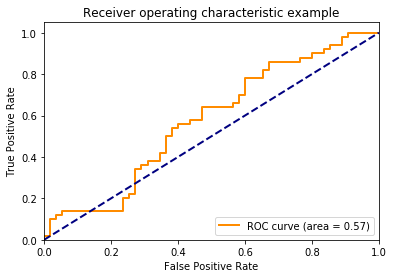


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/sentiment-polarity 


---- Results with Testing Set ----

-- Global Precision --
0.5523809523809524


-- General Report --
              precision    recall  f1-score   support

         yes       0.45      0.40      0.42        43
          no       0.61      0.66      0.64        62

    accuracy                           0.55       105
   macro avg       0.53      0.53      0.53       105
weighted avg       0.54      0.55      0.55       105



-- Confusion Matrix --
    0   1
0  17  26
1  21  41

ROC Curve: 

ROC AUC:  0.6069017254313579


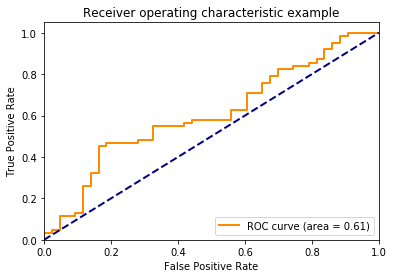

In [3]:
for database in paths:
    print('\n------------------------------------------------------------------------')
    print("Database:", database, '\n')
    
    # Obtain the attributes and labels
    attr_df = get_database(database, 'database_attr.csv')
    labels_df = get_database(database, 'database_labels_mv.csv')
    
    # Preprocessing the attributes
    attr_df = MaxMinScaler(attr_df)
    
    # Get Train, Test and Eval data
    X_train, X_test, X_eval, y_train, y_test, y_eval = split_train_test(attr_df, labels_df)
    
    # Model training with the estimated data
    model = train_model(X_train, y_train)
    
    #print("\n---- Results with Development Set ----\n")
    # Test model with the estimated data
    #test_model(model, X_test, y_test)
    
    print("\n---- Results with Testing Set ----\n")
    # Test model with the gold standard data
    test_model(model, X_eval, y_eval)